## Assignment2: NAS Stock prediction

In [115]:
#import data and lib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('NAS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [117]:
#dropping Null values
df.dropna(inplace = True)

In [118]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4218 non-null   object 
 1   Open       4218 non-null   float64
 2   High       4218 non-null   float64
 3   Low        4218 non-null   float64
 4   Close      4218 non-null   float64
 5   Adj Close  4218 non-null   float64
 6   Volume     4218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 263.6+ KB


In [120]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [121]:
df.drop(['Adj Close'], axis=1,inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,196206.0


In [122]:
#converting Date column
import datetime as dt
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        
df.set_index('Date',inplace=True)                   

In [123]:
X = df.drop(['Close'], axis=1)
y = df['Close']
print(X)

                 Open       High        Low      Volume
Date                                                   
2003-12-18  19.482599  19.596901  19.025499   4978496.0
2003-12-19  19.368299  19.425501  18.282801   1410901.0
2003-12-22  18.739901  18.739901  17.997101    137047.0
2003-12-23  17.997101  17.997101  17.368700    229418.0
2003-12-29  17.425800  17.425800  16.854500    196206.0
...               ...        ...        ...         ...
2020-10-12   0.709000   0.710000   0.650000  48320475.0
2020-10-13   0.676800   0.676800   0.600000  47786200.0
2020-10-14   0.601000   0.640000   0.596200  37534949.0
2020-10-15   0.626000   0.626000   0.585000  26737615.0
2020-10-16   0.605000   0.620000   0.601000  15754218.0

[4218 rows x 4 columns]


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [125]:
LR = LinearRegression()

In [126]:
LR.fit(X_train, y_train)

LinearRegression()

In [127]:
#Prediction percentage score
LR.score(X,y)*100

99.96425852642757

In [128]:
LR.predict(X)

array([19.26263153, 18.63018219, 18.21772355, ...,  0.62221832,
        0.60842359,  0.64987669])

In [129]:
predicted = LR.predict(X_test)

In [130]:
new_df = pd.DataFrame({'Close':y_test,'Predicted Close':predicted})

In [131]:
new_df.head()

,Close,Predicted Close
Date,,
2020-02-10,37.180000,37.248611
2013-12-20,109.411003,109.877216
2012-02-20,47.421001,47.215716
2009-07-28,33.708900,33.010657
2012-11-09,70.845802,71.433788


In [132]:
graph = new_df.head(10)

<AxesSubplot:xlabel='Date'>

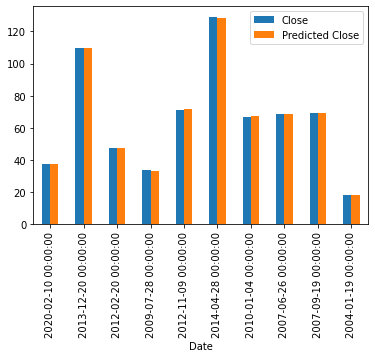

In [133]:
graph.plot(kind='bar')

## Made by Kenneth Eide and Sverre Habberstad